# Introduction
This notebook contains work showing the exploratory data analysis work for this AITA classifier and chatbox project. It shows work going over most common words in both the titles of posts and the body of posts. It also examines distribution of assholes accross number of words, ease of reading and grade level. Lastly, the predictive importance of words is examined. This is examined both as whole, as depending on whether or not someone is the asshole.  

## Table of Contents
- [Importing Libraries](#section1)
- [Examining Most Frequent Words](#section2)
- [Examining Distributions of Assholes across features](#section3)
    - [Title Distributions](#section4)
    - [Text Distributions](#section5)
- [Feature Importance](#section6)

### Importing Libaries <a name="section1"></a>
Import necessary libraries and load seaborn plotting settings

In [1]:
import numpy as np
import pandas as pd
import CommentPull.CommentPuller #Import custom class for handling labeling and df's. 
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns

In [2]:
#To make the data easier to read
plt.rcParams['figure.figsize'] = (10, 10)
sns.set()

### Examining Most Frequent Words <a name="section2"></a>
Let's examine what words appear most frequently across our posts.

In [3]:
#Load our commentpuller object containing our dataframes1
comment_puller = CommentPull.CommentPuller.CommentPuller(load=True)

Lets look at top words across both the titles of posts and their bodies. 

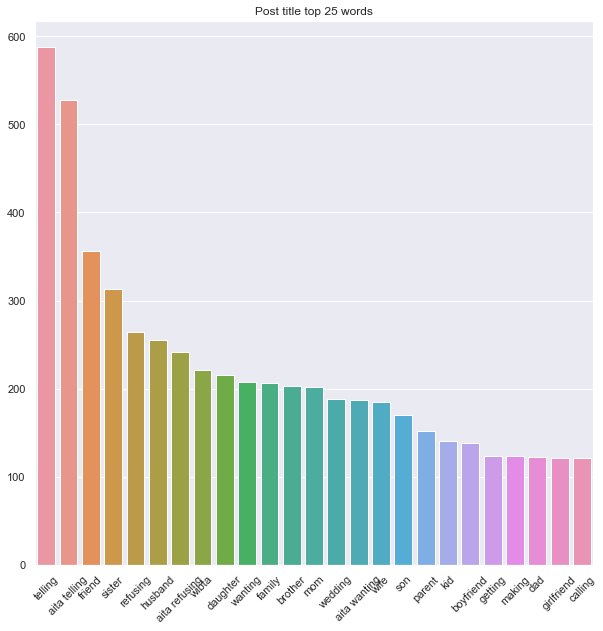

In [4]:
comment_puller.plot_top25('title')

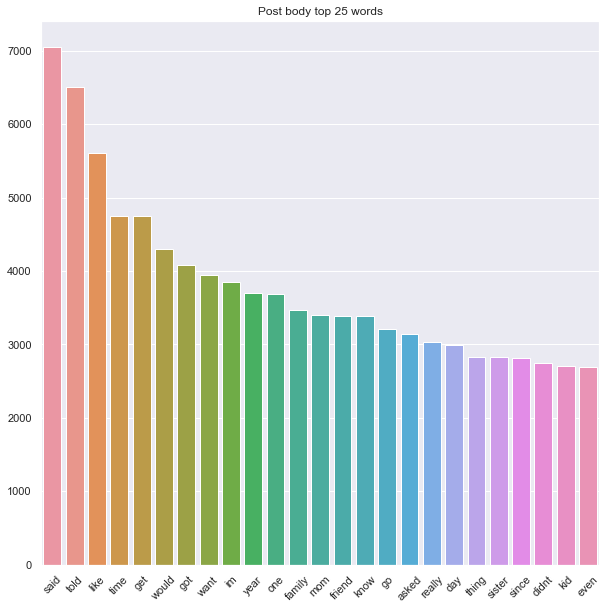

In [5]:
comment_puller.plot_top25('text')

Seems that tell or versions of that word appear the most frequently. Posts may revolve around people asking questions about fights or conversations they've had. Let's see if anything comes up when we look at the top words for asshole and non-assholes

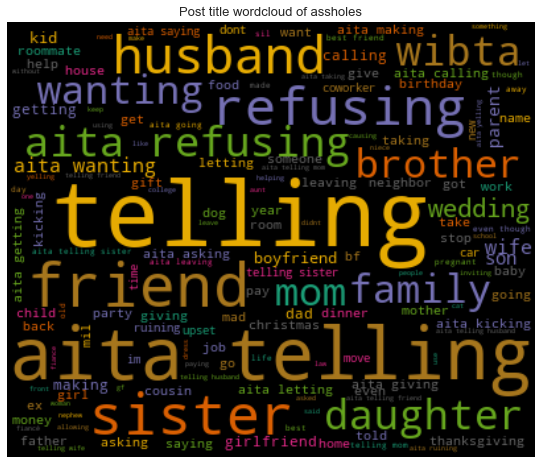

In [6]:
comment_puller.generate_wordcloud('title', assholes=True)

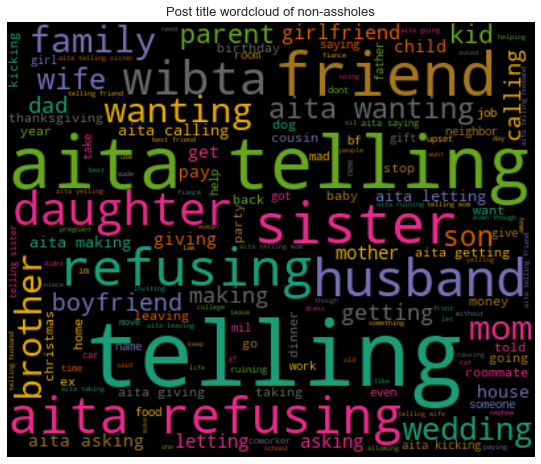

In [7]:
comment_puller.generate_wordcloud('title', assholes=False)

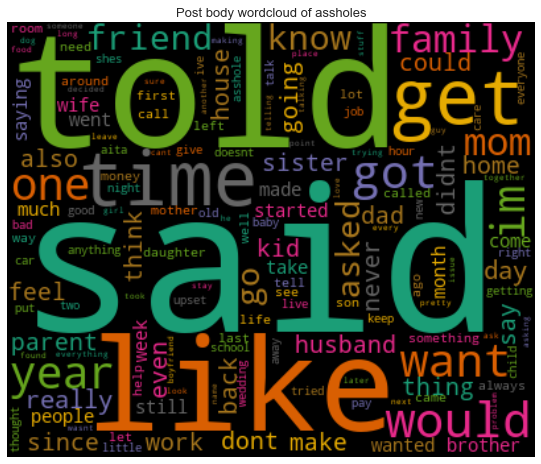

In [8]:
comment_puller.generate_wordcloud('text', assholes=True)

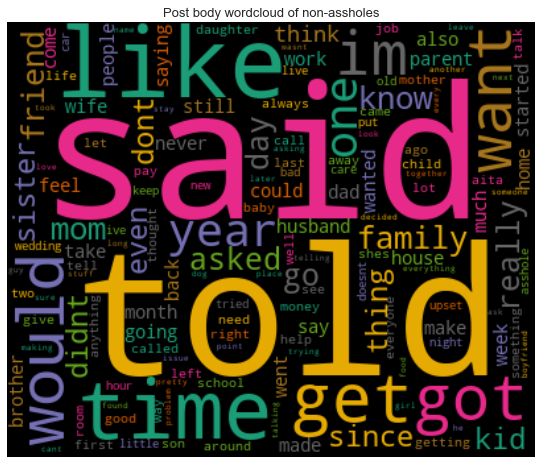

In [9]:
comment_puller.generate_wordcloud('text', assholes=False)

Seems that the versions of told are similary prevalent across both assholes and non-assholes alike. We do see a theme around family and family members evolve here. This gives us a little better idea what our posts are about. 

### Examining Distributions of Assholes across Features <a name="section3"></a>
In the data wrangling portion of this project, we added features like number of words, ease of readability and grade level. Let's now examine these features to see if anything helpful can be derived from them. 

#### Title Distributions <a name="section4"></a>
Let's examine title distributions first. In the next cell, let's cut the text data into 10 equal proportions. We will then see what percentage of assholes reside in each proportion.  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0.999, 212.0]'),
  Text(1, 0, '(212.0, 268.0]'),
  Text(2, 0, '(268.0, 315.9]'),
  Text(3, 0, '(315.9, 365.0]'),
  Text(4, 0, '(365.0, 413.0]'),
  Text(5, 0, '(413.0, 463.0]'),
  Text(6, 0, '(463.0, 517.0]'),
  Text(7, 0, '(517.0, 558.0]'),
  Text(8, 0, '(558.0, 611.7]'),
  Text(9, 0, '(611.7, 1957.0]')])

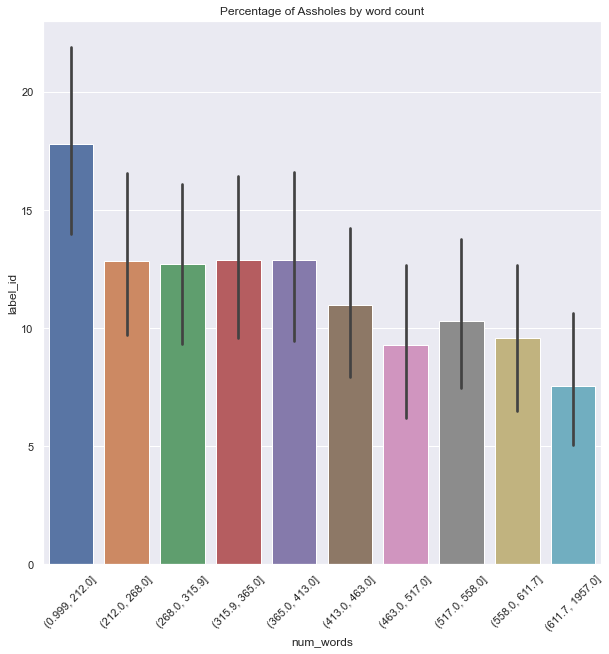

In [10]:
#pd's qcut will cut up our data for us. 
#Using the estimator parameter, we can get percentage of assholes for each bin.
sns.barplot(x=pd.qcut(comment_puller.text_df['num_words'], 10), y='label_id', 
            estimator=lambda x: sum(x)*100.0/len(x), data=comment_puller.text_df)#Stats test?
plt.title('Percentage of Assholes by word count')
#Rotate ticks for readability
plt.xticks(rotation=45)

While the error bars are realtivy big, we can still see a pattern here. We can see that people who use more words are less likely to be assholes, while those who use fewer are more likely to be an asshole. I'm not sure if it's the data skewing my view, but this makes sense to me. I would guess that an asshole would explain themselves more quickly and lew out more detail if I were talking to them. interesting to see that instinct in the data here.

In [11]:
#Start by making a dataframe with label_id's and bin values.
#This will allow us to run a t_test to see if distributions with these bins are significant

#Get a dataframe with just label_id's
ttest_df = comment_puller.text_df[['label_id']]
#Add bin labels
ttest_df['bin'] = pd.qcut(comment_puller.text_df['num_words'], 10)
#Examine new df
ttest_df.head(10)

<ipython-input-11-faee5e131633>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttest_df['bin'] = pd.qcut(comment_puller.text_df['num_words'], 10)


,label_id,bin
0,0,"(463.0, 517.0]"
1,0,"(611.7, 1957.0]"
2,0,"(365.0, 413.0]"
3,0,"(365.0, 413.0]"
4,0,"(365.0, 413.0]"
5,0,"(268.0, 315.9]"
6,0,"(268.0, 315.9]"
7,0,"(463.0, 517.0]"
8,0,"(315.9, 365.0]"
9,0,"(268.0, 315.9]"


In [13]:
#Let's now run an anova(similar to t-test with >2 groups). 
from scipy import stats
#Get list of bin objects for comparision
bins = ttest_df['bin'].unique()

#We need to get each group by bin for this first
bin0 = ttest_df['label_id'][ttest_df['bin']==bins[0]]
bin1 = ttest_df['label_id'][ttest_df['bin']==bins[1]]
bin2 = ttest_df['label_id'][ttest_df['bin']==bins[2]]
bin3 = ttest_df['label_id'][ttest_df['bin']==bins[3]]
bin4 = ttest_df['label_id'][ttest_df['bin']==bins[4]]
bin5 = ttest_df['label_id'][ttest_df['bin']==bins[5]]
bin6 = ttest_df['label_id'][ttest_df['bin']==bins[6]]
bin7 = ttest_df['label_id'][ttest_df['bin']==bins[7]]
bin8 = ttest_df['label_id'][ttest_df['bin']==bins[8]]
bin9 = ttest_df['label_id'][ttest_df['bin']==bins[9]]

#Now we can run the test
stats.f_oneway(bin0, bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9)

F_onewayResult(statistic=2.817276091844691, pvalue=0.00266626170725586)

We get a p-value of 0.2%, which tells us that this distribution is not due to chance. Let's now examine distributions through ease scores and grade level. 

Text(0.5, 1.0, 'Text Assholes and Non-Assholes vs Ease Score')

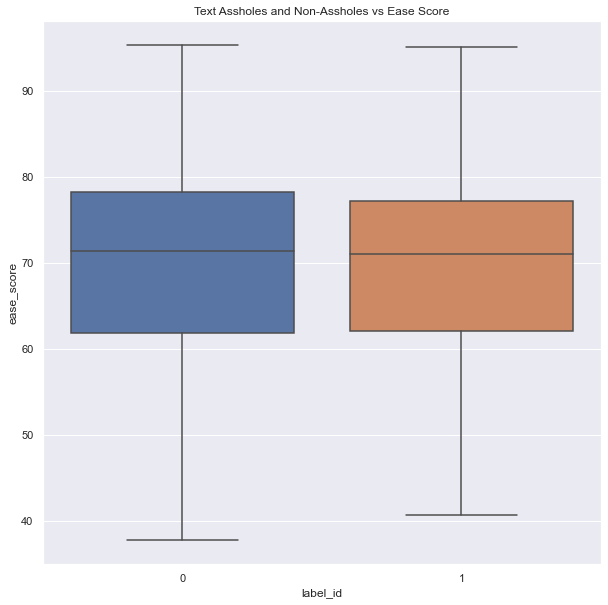

In [14]:
sns.boxplot(x='label_id', y='ease_score', data=comment_puller.text_df, showfliers=False)
plt.title('Text Assholes and Non-Assholes vs Ease Score')

Text(0.5, 1.0, 'Text Assholes and Non-Assholes vs Grade Level')

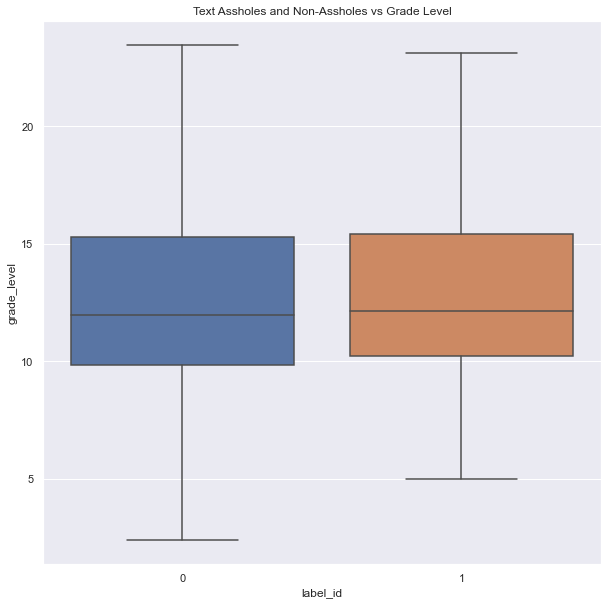

In [15]:
sns.boxplot(x='label_id', y='grade_level', data=comment_puller.text_df, showfliers=False)
plt.title('Text Assholes and Non-Assholes vs Grade Level')

Results are less obvious here. Let's run a few tests to ensure our results our significant. 

In [16]:
#Run stats tests to determine significance of above graphs
print(stats.ttest_ind(comment_puller.text_df['ease_score'][comment_puller.text_df['label_id']==0],
                      comment_puller.text_df['ease_score'][comment_puller.text_df['label_id']==1]))
print(stats.ttest_ind(comment_puller.text_df['grade_level'][comment_puller.text_df['label_id']==0],
                      comment_puller.text_df['grade_level'][comment_puller.text_df['label_id']==1]))

Ttest_indResult(statistic=0.33219296502281237, pvalue=0.7397631015395965)
Ttest_indResult(statistic=-0.2820154389624997, pvalue=0.7779480555780753)


Seems only our first result is significant. This is good as the other plots weren't very clear, and now we know why. Let's now examine distributions for titles.

#### Title Distributions <a name="section5"></a>
Let's now examine distributions across the title of posts.

Text(0.5, 1.0, 'Title Assholes and Non-Assholes vs Word Count')

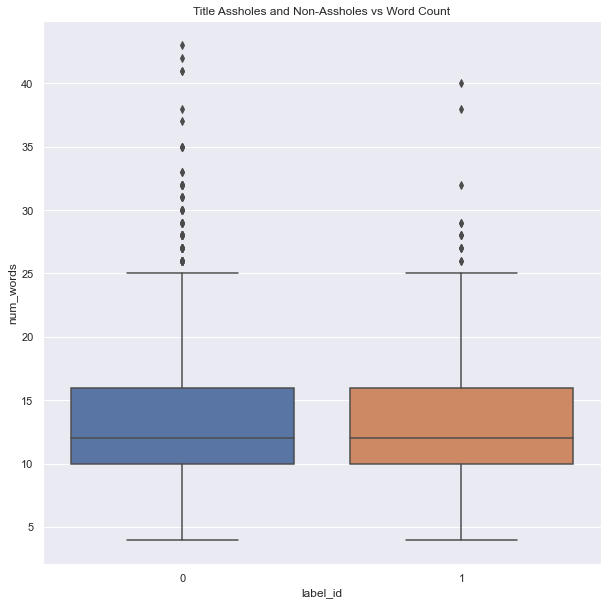

In [17]:
sns.boxplot(x='label_id', y='num_words', data=comment_puller.title_df)
plt.title('Title Assholes and Non-Assholes vs Word Count')

Text(0.5, 1.0, 'Title Assholes and Non-Assholes vs Ease Score')

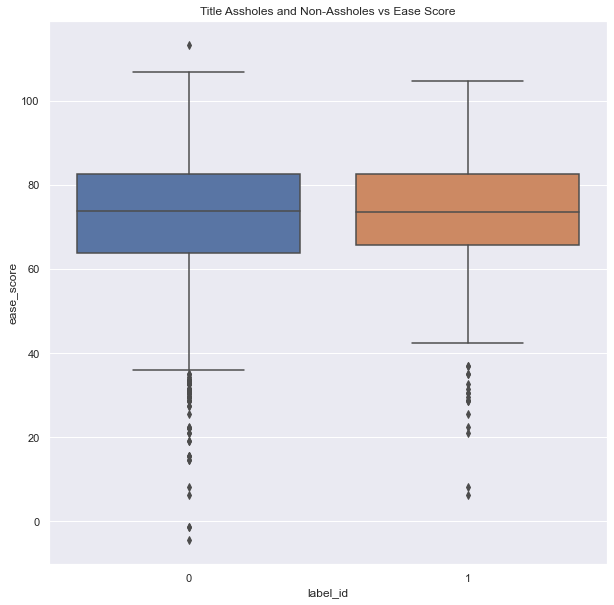

In [18]:
sns.boxplot(x='label_id', y='ease_score', data=comment_puller.title_df)
plt.title('Title Assholes and Non-Assholes vs Ease Score')

Text(0.5, 1.0, 'Title Assholes and Non-Assholes vs Grade Level')

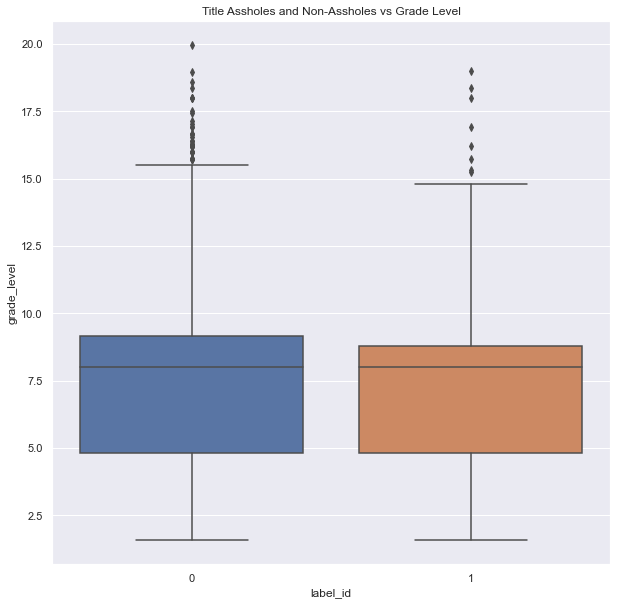

In [19]:
sns.boxplot(x='label_id', y='grade_level', data=comment_puller.title_df)
plt.title('Title Assholes and Non-Assholes vs Grade Level')

Again, these results are a little less clear. Let's run another test to check for significane.

In [20]:
#Run stats tests to determine significane of above graphs
print(stats.ttest_ind(comment_puller.title_df['num_words'][comment_puller.title_df['label_id']==0],
                      comment_puller.title_df['num_words'][comment_puller.title_df['label_id']==1]))
print(stats.ttest_ind(comment_puller.title_df['ease_score'][comment_puller.title_df['label_id']==0],
                      comment_puller.title_df['ease_score'][comment_puller.title_df['label_id']==1]))
print(stats.ttest_ind(comment_puller.title_df['grade_level'][comment_puller.title_df['label_id']==0],
                      comment_puller.title_df['grade_level'][comment_puller.title_df['label_id']==1]))

Ttest_indResult(statistic=-0.12150542198793196, pvalue=0.9032975741043013)
Ttest_indResult(statistic=-0.22132258943470562, pvalue=0.8248539483511762)
Ttest_indResult(statistic=0.8892798642783275, pvalue=0.37391274186444723)


None of these plots are statstically significant, so we can proceed with our analysis.

### Feature Importance <a name="section6"></a>
Let's now examine feature importances for these datasets. This will be done by training a logisitic classifier on the data, then getting the coefficients for the data, which convey importance.

In [21]:
from sklearn.linear_model import LogisticRegression
#Get dependant and independant data from df's
X_title = comment_puller.title_df.drop(['post_id', 'label_id'], axis=1)
X_text = comment_puller.text_df.drop(['post_id', 'label_id'], axis=1)
y_title = comment_puller.title_df['label_id']
y_text = comment_puller.text_df['label_id']
#Make a model for both text and title df's. 
#No need to split as no testing will be done
log_class_title = LogisticRegression()
log_class_text = LogisticRegression()
#Fit classes on their resepective data
log_class_title.fit(X_title, y_title)
log_class_text.fit(X_text, y_text)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()

In [22]:
#Extract feature importances from models and make them into dataframes
feature_importance_title = pd.DataFrame({'feature': X_title.columns, 
                                         'feature_importance':[abs(i) for i in log_class_title.coef_[0]]})
feature_importance_text = pd.DataFrame({'feature': X_text.columns, 
                                         'feature_importance':[abs(i) for i in log_class_text.coef_[0]]})

Text(0.5, 1.0, 'Top 15 most important Text words')

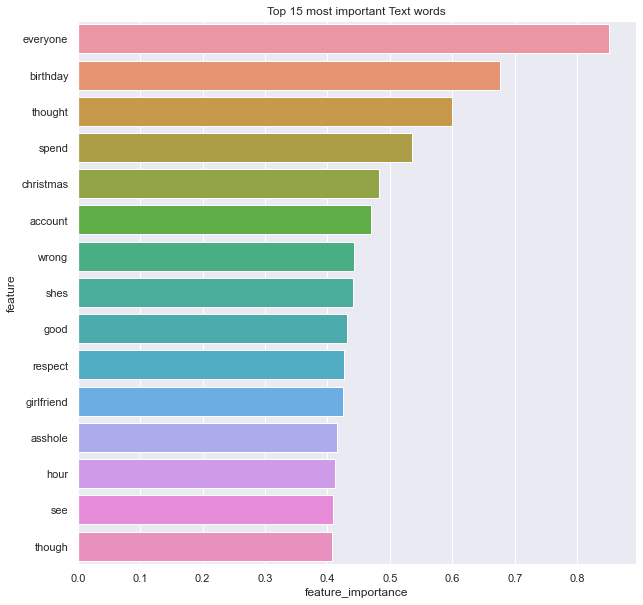

In [23]:
#Plot most importance words for text data
sns.barplot(x='feature_importance', y='feature',
            data=feature_importance_text.sort_values('feature_importance', ascending=False).head(15))
plt.title('Top 15 most important Text words')

In [24]:
ttest_df['bin'].unique()[1]

Interval(611.7, 1957.0, closed='right')

Text(0.5, 1.0, 'Top 15 most important Title words')

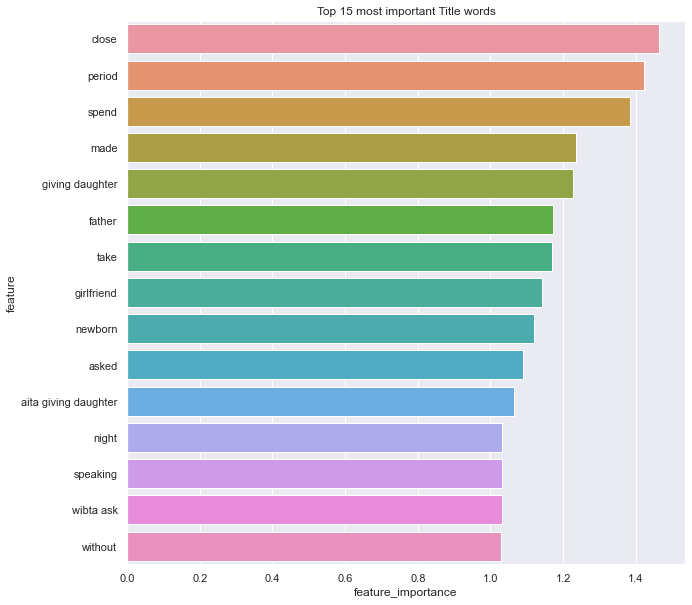

In [25]:
#Plot most important words for title data
sns.barplot(x='feature_importance', y='feature',
            data=feature_importance_title.sort_values('feature_importance', ascending=False).head(15))
plt.title('Top 15 most important Title words')

This is interesting, as we see a few words appear on both graphs. There is also a small theme of relationships and family throughout the words. Now, let's examine words for both titles and texts and see what words predict more strongly for asshole or non-asshole. This will be done by creating an indentity matrix for both title and text equal to the length of their vocabs. These matrices will represent documents each containing one word from the vocabs. When we get predictions probabilites for these documents, we will get the prediction probablitlies for that single word. We can then use these probabilites to determine how strongly a word predicts being an asshole or not. 

In [26]:
#Create indentity matrices same length as vocabularies.
#Subtracting 2 to account for dropped rows in X_title
title_iden = np.identity(comment_puller.title_df.shape[1]-2)
text_iden = np.identity(comment_puller.text_df.shape[1]-2)

#Use fitted models to predict on indentity matrices. 
#This will give us probablilty of being an asshole for each individual word
title_preds = log_class_title.predict_proba(title_iden)[:, 1]
text_preds = log_class_text.predict_proba(text_iden)[:, 1]

#Turn probabilites into dataframe
#Exclude first 5 rows of columns to get only the words
title_probs = pd.DataFrame(title_preds, columns=['probs_asshole'], index=comment_puller.title_df.columns[2:])
text_probs = pd.DataFrame(text_preds, columns=['probs_asshole'], index=comment_puller.text_df.columns[2:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Top 15 words for prediciting assholes in Title')

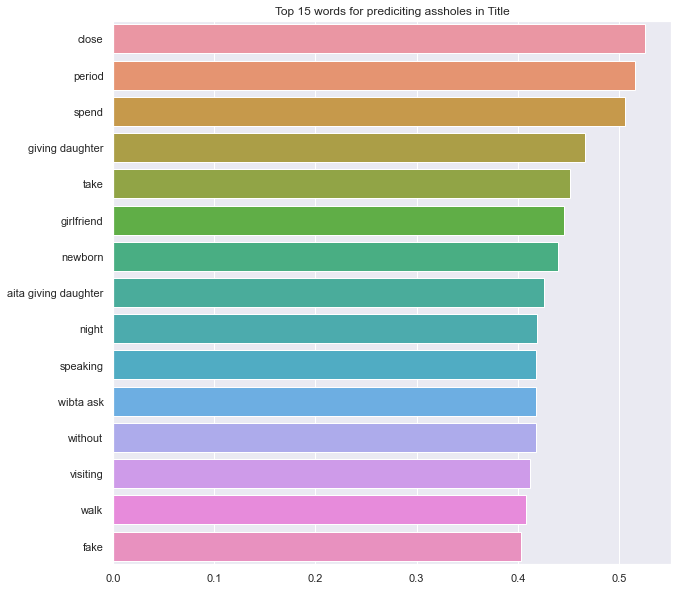

In [27]:
#Plot most important words for assholes in title data
sns.barplot(x=title_probs.sort_values('probs_asshole', ascending=False).head(15).values.reshape(15,), 
            y=title_probs.sort_values('probs_asshole', ascending=False).head(15).index)
plt.title('Top 15 words for prediciting assholes in Title')

Text(0.5, 1.0, 'Top 15 words for prediciting non-assholes in Title')

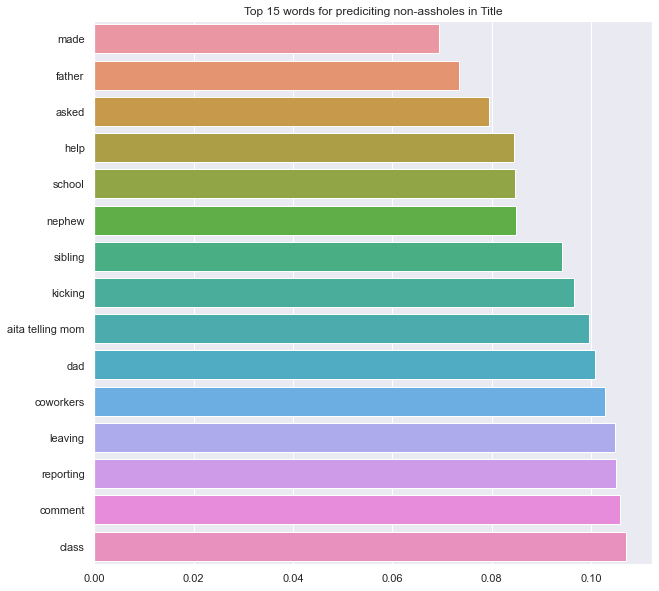

In [28]:
#Plot most important words for non-assholes in title data
sns.barplot(x=title_probs.sort_values('probs_asshole', ascending=True).head(15).values.reshape(15,), 
            y=title_probs.sort_values('probs_asshole', ascending=True).head(15).index)
plt.title('Top 15 words for prediciting non-assholes in Title')

Text(0.5, 1.0, 'Top 15 words for prediciting assholes in Text')

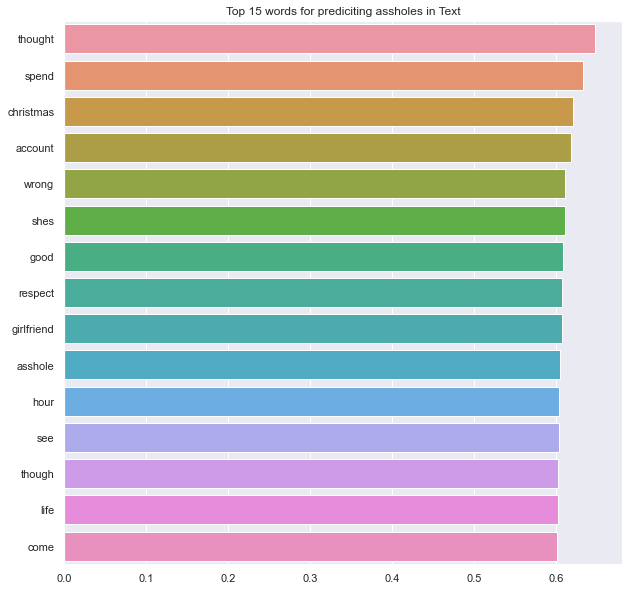

In [29]:
#Plot most important words for assholes in text data
sns.barplot(x=text_probs.sort_values('probs_asshole', ascending=False).head(15).values.reshape(15,), 
            y=text_probs.sort_values('probs_asshole', ascending=False).head(15).index)
plt.title('Top 15 words for prediciting assholes in Text')

Text(0.5, 1.0, 'Top 15 words for prediciting non-assholes in Text')

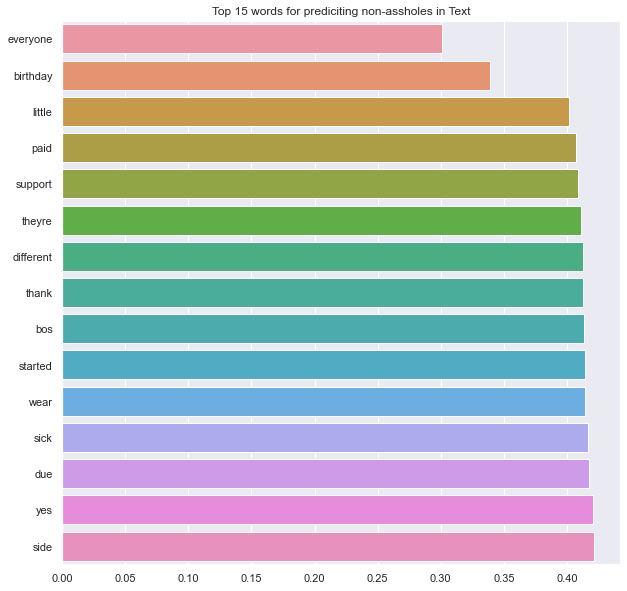

In [30]:
#Plot most important words for non-assholes in text data
sns.barplot(x=text_probs.sort_values('probs_asshole', ascending=True).head(15).values.reshape(15,), 
            y=text_probs.sort_values('probs_asshole', ascending=True).head(15).index)
plt.title('Top 15 words for prediciting non-assholes in Text')

We seem a few interesting things here. Spend and girlfriend appear on both asshole plots. These words to appear on both of the overall graphs as well, and we now see what they predict. The non-asshole plots share no similar words. Everyone and birthday were the top words for the text data, and are the strongest words for prediciting non-assholes for that data. Likewise, close, period, spend and giving daughter were the top words for the title data, and are the top words for non-assholes. It is interesting to see how the overall words show up in the asshole and non-asshole plots. 
With this analysis complete, we now have a good understanding of our data and can preceed with modeling. 